# UnitedStates_COVID_19_dataset

#### This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

#### Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.

In [1]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv('csse_covid_19_daily_reports_us.csv')

In [3]:
df.shape

(58, 18)

In [4]:
#dataset contain 58 rows and 18 column

In [5]:
#check rows
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [6]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null object
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               42 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     33 non-null float64
Mortality_Rate          57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    33 non-null float64
dtypes: float64(10), int64(4), object(4)
memory usage: 8.2+ KB


In [7]:
#check missing 
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [8]:
df.head(2)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.43886
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN


In [9]:
df=df.drop(['Province_State','Country_Region','Last_Update','ISO3'],axis=1)


In [10]:
df = df.apply(pd.to_numeric)

In [11]:
df['Lat']=df.fillna(df['Lat'].mean())

In [12]:
df['Long_']=df.fillna(df['Long_'].mean())



In [13]:
df['Recovered']=df.fillna(df['Recovered'].mean())

In [14]:
df['People_Hospitalized']=df.fillna(df['People_Hospitalized'].mean())
df['Testing_Rate']=df.fillna(df['Testing_Rate'].mean())
df['Hospitalization_Rate']=df.fillna(df['Hospitalization_Rate'].mean())

In [15]:
df['Incident_Rate']=df.fillna(df['Incident_Rate'].mean())
df['People_Tested']=df.fillna(df['People_Tested'].mean())
df['Mortality_Rate']=df.fillna(df['Mortality_Rate'].mean())

In [16]:
df.isnull().sum()

Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

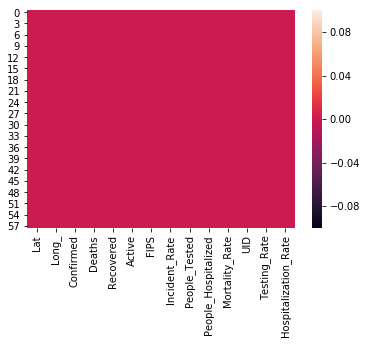

In [17]:
sns.heatmap(df.isnull())

In [18]:
#datatypes
df.dtypes

Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [19]:
#describe
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,36.840089,26756.086207,1611.017241,36.840089,20070.724138,3288.086207,36.840089,36.840089,36.840089,36.840089,7.676194e+07,36.840089,36.840089
std,10.694329,10.694329,52562.031122,4084.750891,10.694329,41294.705318,17408.350591,10.694329,10.694329,10.694329,10.694329,2.378302e+07,10.694329,10.694329
min,-14.271000,-14.271000,0.000000,0.000000,-14.271000,0.000000,1.000000,-14.271000,-14.271000,-14.271000,-14.271000,1.600000e+01,-14.271000,-14.271000
25%,34.872800,34.872800,2596.000000,74.000000,34.872800,812.500000,18.250000,34.872800,34.872800,34.872800,34.872800,8.400001e+07,34.872800,34.872800
50%,38.978600,38.978600,10148.500000,385.000000,38.978600,5644.500000,32.500000,38.978600,38.978600,38.978600,38.978600,8.400003e+07,38.978600,38.978600
75%,42.214075,42.214075,29395.500000,1394.250000,42.214075,19291.250000,47.750000,42.214075,42.214075,42.214075,42.214075,8.400004e+07,42.214075,42.214075
max,61.370700,61.370700,354370.000000,28636.000000,61.370700,263848.000000,99999.000000,61.370700,61.370700,61.370700,61.370700,8.410000e+07,61.370700,61.370700


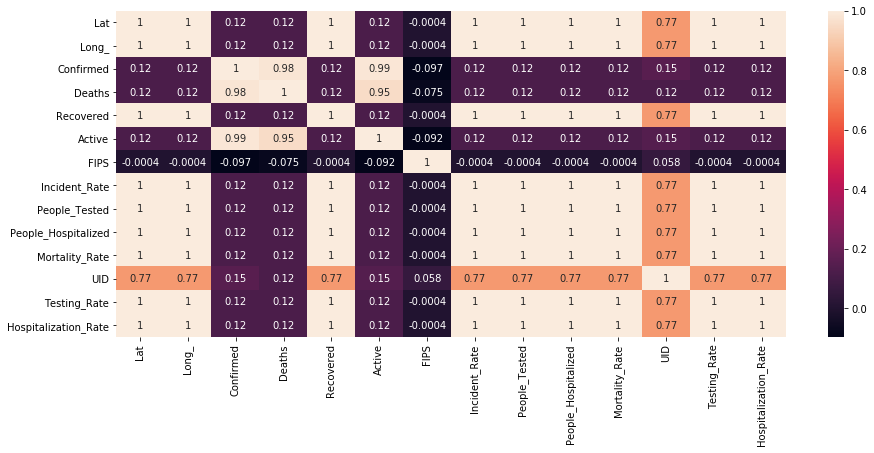

In [20]:
#check corr
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.head(2)

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,32.3182,32.3182,13052,522,32.3182,12530.0,1,32.3182,32.3182,32.3182,32.3182,84000001,32.3182,32.3182
1,61.3707,61.3707,401,10,61.3707,39.0,2,61.3707,61.3707,61.3707,61.3707,84000002,61.3707,61.3707


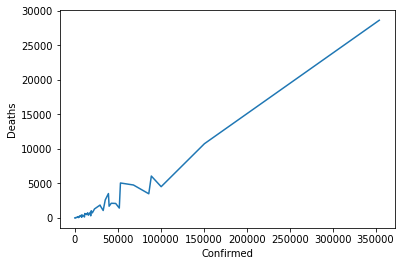

In [22]:
sns.lineplot(x='Confirmed',y='Deaths',data=df)

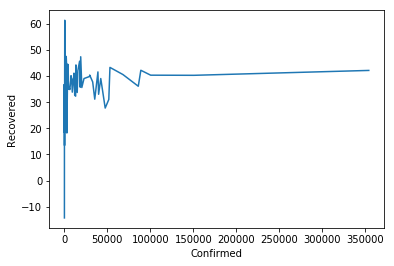

In [23]:
sns.lineplot(x='Confirmed',y='Recovered',data=df)

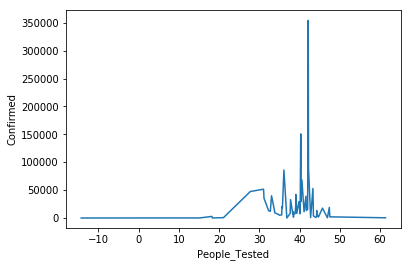

In [24]:
sns.lineplot(y='Confirmed',x='People_Tested',data=df)

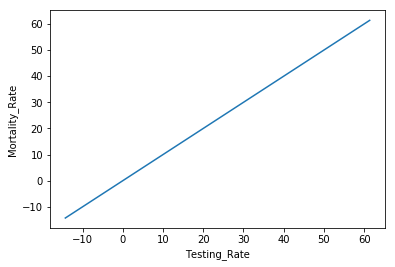

In [25]:
sns.lineplot(x='Testing_Rate',y='Mortality_Rate',data=df)

In [26]:
df.drop(['UID','Lat','Long_'],axis=1,inplace=True)

In [27]:
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,13052,522,32.3182,12530.0,1,32.3182,32.3182,32.3182,32.3182,32.3182,32.3182
1,401,10,61.3707,39.0,2,61.3707,61.3707,61.3707,61.3707,61.3707,61.3707
2,0,0,-14.2710,0.0,60,-14.2710,-14.2710,-14.2710,-14.2710,-14.2710,-14.2710
3,14906,747,33.7298,10386.0,4,33.7298,33.7298,33.7298,33.7298,33.7298,33.7298
4,5003,107,34.9697,1044.0,5,34.9697,34.9697,34.9697,34.9697,34.9697,34.9697


In [28]:
#lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(58, 11)
(54, 11)


In [29]:
x=df.drop('Deaths',axis=1)
y=df['Deaths']


In [30]:
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression(),SVC(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  77  is  0.978755951553035
SVC() max r2 score corresponding to  62  is  0.8794950957681
DecisionTreeRegressor() max r2 score corresponding to  60  is  0.964543346764548
RandomForestRegressor() max r2 score corresponding to  54  is  0.9824237614376607
KNeighborsRegressor() max r2 score corresponding to  45  is  0.9495362077752019


In [33]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 54,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.9134345118485184
rf_accuracy: 0.91


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.61832005 0.70748096 0.69576199 0.77060835 0.24257547]


In [35]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  166.8123811352143
r2_score is:  0.9833118767656541


In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
42,144,132.78
31,138,556.65
45,538,525.10
51,54,12.09
40,1781,1881.74


In [37]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(regressor, 'covid_19.joblib') 


['covid_19.joblib']